In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data_df = pd.read_csv(f"C:\\Users\\johnh\\OneDrive\\Documents\\공부\\2023년\\인공지능프로젝트\\기말프로젝트\\final_data\\\data_by_all_20230518.csv",
                      header=0)


In [3]:
data_df.head(5)

,ID,fertilizer_price_index_all,fertilizer_price_index_nitrogen,fertilizer_price_index_phosphate,oil_price,meat_total(kg/capita),meat_total_us(lb/capita),fruits(kg/capita),vegetable(kg/capita),coffee_us(gal/capita),...,population_world,population_asia_all,population_asia_east&southeast,cpi_us,gini_us,harvestedarea_rice_asia(ha),yield_rice_asia(hg/ha),production_rice_asia(ton),food_consumption_us(kcal),crop_price_us
0,1900-01,2.687540,9.292814,1.0,7.48391,10.803852,80.945119,34.539159,11.243287,31.117215,...,312932.232000,56415.697000,96662.795,8.664286,26.981158,8.572384e+07,5954.0,68840806.0,3007.102825,106.0
1,1900-02,2.701685,9.297349,1.0,7.48391,10.803852,80.945119,34.539159,11.243287,31.117215,...,316540.136167,58598.259167,97881.040,8.671429,26.991586,8.576468e+07,5971.0,68840806.0,3007.738058,106.0
2,1900-03,2.715830,9.301883,1.0,7.48391,10.803852,80.945119,34.539159,11.243287,31.117215,...,320148.040333,60780.821333,99099.285,8.678571,27.002013,8.580553e+07,5988.0,68840806.0,3008.373292,106.0
3,1900-04,2.729975,9.306417,1.0,7.48391,10.803852,80.945119,34.539159,11.243287,31.117215,...,323755.944500,62963.383500,100317.530,8.685714,27.012441,8.584637e+07,6005.0,68840806.0,3009.008525,106.0
4,1900-05,2.744120,9.310951,1.0,7.48391,10.803852,80.945119,34.539159,11.243287,31.117215,...,327363.848667,65145.945667,101535.775,8.692857,27.022868,8.588721e+07,6022.0,68840806.0,3009.643758,106.0


### 미국 CPI 지수 추세 시각화

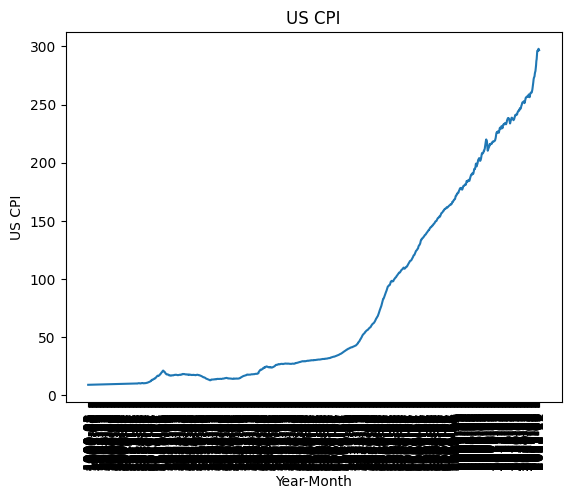

In [5]:
x = list(data_df['ID'])
y = list(data_df['cpi_us'])

# 그래프 생성
plt.plot(x, y)

# X축 레이블 및 기울기 설정
plt.xticks(rotation=90)
plt.xlabel('Year-Month')

# Y축 레이블 설정
plt.ylabel('US CPI')

# 그래프 제목 설정
plt.title('US CPI')

# 그래프 출력
plt.show()

### 미국 CPI 지수의 각 Feature 와의 상관관계 확인

In [12]:
#data_df.loc['fertilizer_price_index_all':].corr()['cpi_us'].sort_values(ascending=False)
temp_data=data_df.loc[:, ['fertilizer_price_index_all', 'fertilizer_price_index_nitrogen',
       'fertilizer_price_index_phosphate', 'oil_price',
       'meat_total(kg/capita)', 'meat_total_us(lb/capita)',
       'fruits(kg/capita)', 'vegetable(kg/capita)', 'coffee_us(gal/capita)',
       'tea_us(gal/capita)', 'cocoa_us(lb/capita)', 'co2(ppm)',
       'population_us_total', 'population_us_asian', 'population_world',
       'population_asia_all', 'population_asia_east&southeast', 'cpi_us',
       'gini_us', 'harvestedarea_rice_asia(ha)', 'yield_rice_asia(hg/ha)',
       'production_rice_asia(ton)', 'food_consumption_us(kcal)',
       'crop_price_us']]
temp_data.corr()['cpi_us'].sort_values(ascending=False)

cpi_us                              1.000000
population_us_asian                 0.983484
production_rice_asia(ton)           0.966598
yield_rice_asia(hg/ha)              0.965532
population_world                    0.950643
population_asia_all                 0.950520
crop_price_us                       0.947617
fertilizer_price_index_all          0.941409
fertilizer_price_index_nitrogen     0.934237
population_asia_east&southeast      0.924665
meat_total(kg/capita)               0.919257
fertilizer_price_index_phosphate    0.918930
vegetable(kg/capita)                0.907113
co2(ppm)                            0.894865
population_us_total                 0.893624
gini_us                             0.892887
harvestedarea_rice_asia(ha)         0.892364
food_consumption_us(kcal)           0.891115
oil_price                           0.866901
fruits(kg/capita)                   0.860058
meat_total_us(lb/capita)            0.810999
cocoa_us(lb/capita)                 0.796442
tea_us(gal

### ARIMA 통계 모델(AutoRegressive Integrated Moving Average)을 사용한 시계열 예측

- ARIMA : 시계열 데이터를 분석하고 예측하기 위해 사용, 자기회귀(Auto Regressive), 누적 차분(Integrated), 이동 평균(Moving Average) 세가지 요소를 결합한 모델로 통계적 모델.
- CPI에 Outlier가 없고, 추세가 중요해보임, 장기적인 예측도 할 필요가 없이 앞으로 1~2년 데이터에 대한 예측만을 필요로 하므로 ARIMA를 사용해봄.

---
- p, q : 자기상관 함수, 부분자기상관 함수 - 통계적으로 유의한 시차에서 감소되는 패턴을 파악하여 p, q 값을 설정. 여기서는 p=2, q=0으로 설정하여 자기 상관함수만 값을 줬음. q 값은 이전 예측 오차들의 선형 조합 예측이므로 0을 줘 값을 넣지 않았음. p는 자기 회귀 값을 선형 조합으로 예측하는 값이기 때문에 2를 넣어서 가장 크게 반영 함.
- d : 차분(Differencing) - 시계열 데이터를 정상 시계열로 변환하기 위한 차분(Differencing) 횟수를 의미. 시계열 데이터가 정상성을 가지지 않을 때, 차분을 통해 추세나 계절성 요소를 제거하고 정상성을 확보. d=1로 설정함. cpi data에는 outlier가 거의 없기 때문에 1의 값을 줌.

In [43]:
from statsmodels.tsa.arima.model import ARIMA

C:\Users\johnh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\johnh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\johnh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2023-01-01    296.161967
2023-02-01    295.760198
2023-03-01    295.509185
2023-04-01    295.352641
2023-05-01    295.255038
2023-06-01    295.194186
2023-07-01    295.156247
2023-08-01    295.132593
2023-09-01    295.117846
2023-10-01    295.108652
2023-11-01    295.102920
2023-12-01    295.099346
Freq: MS, Name: predicted_mean, dtype: float64


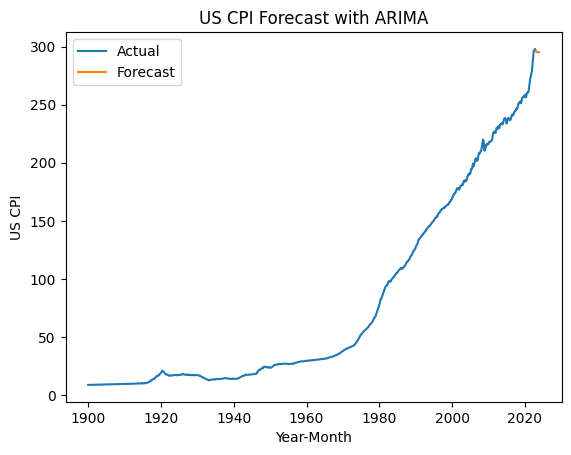

In [44]:
# 데이터 불러오기
data_arima = data_df.loc[:, ['ID', 'cpi_us']]

data_arima['ID'] = pd.to_datetime(data_arima['ID'], format='%Y-%m') 
data_arima.set_index('ID', inplace=True)  # 날짜 열을 인덱스로 설정
cpi_data = data_arima['cpi_us']

p, d, q = 2, 1, 0
# ARIMA 모델 학습
model = ARIMA(cpi_data, order=(p, d, q))
model_fit = model.fit()

# 미래 예측
future_periods = 12 # 미래의 몇 개월까지 예측할 것인지 설정
forecast = model_fit.forecast(steps=future_periods)

# 예측 결과 출력
print(forecast)

# 그래프로 시각화
plt.plot(data_arima, label='Actual')
plt.plot(forecast, label='Forecast')
plt.xlabel('Year-Month')
plt.ylabel('US CPI')
plt.title('US CPI Forecast with ARIMA')
plt.legend()
plt.show()

### LSTM 모델을 이용한 CPI 지수 예측

- 연-월을 Input으로 넣고 CPI 지수를 target value로 설정
- sequence length를 24로 설정하여 추세를 그리도록 하였음. 2년치의 데이터를 참고하여 다음을 예측하도록 한 것임. 짧은 개월로 학습했을 때는 단시간의 데이터에 대한 경향성을 따라갔으나 24개월로 늘리니 더 긴 경향성을 참고할 수 있게 됐음.

In [4]:
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler

In [5]:
# 데이터 불러오기
data_lstm = data_df.loc[:, ['ID', 'cpi_us']]

data_lstm['ID'] = pd.to_datetime(data_lstm['ID'], format='%Y-%m') 
data_lstm.set_index('ID', inplace=True)  # 날짜 열을 인덱스로 설정
cpi_data = data_lstm['cpi_us']

In [6]:
scaler = MinMaxScaler()  # 데이터 스케일링을 위한 scaler 객체 생성
scaled_data = scaler.fit_transform(cpi_data.values.reshape(-1, 1))  # 데이터 스케일링 적용

In [7]:
# 시퀀스 데이터 생성
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return torch.tensor(X).float(), torch.tensor(y).float()

In [75]:
# 전체 데이터셋을 학습시킴

sequence_length = 12  # 시퀀스 길이 설정
X_train, y_train = create_sequences(scaled_data, sequence_length)

In [76]:
# LSTM 모델 구성
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        output, _ = self.lstm(x)
        output = output[:, -1, :]
        output = self.fc(output)
        return output

In [77]:
input_size = 1
hidden_size = 64
output_size = 1

model = LSTMModel(input_size, hidden_size, output_size)

# 모델 학습
learning_rate = 0.001
num_epochs = 200

In [78]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [79]:
for epoch in range(num_epochs):
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}')

Epoch [10/200], Loss: 0.091028
Epoch [20/200], Loss: 0.066373
Epoch [30/200], Loss: 0.053047
Epoch [40/200], Loss: 0.024272
Epoch [50/200], Loss: 0.004214
Epoch [60/200], Loss: 0.003071
Epoch [70/200], Loss: 0.002403
Epoch [80/200], Loss: 0.001081
Epoch [90/200], Loss: 0.000724
Epoch [100/200], Loss: 0.000420
Epoch [110/200], Loss: 0.000220
Epoch [120/200], Loss: 0.000126
Epoch [130/200], Loss: 0.000089
Epoch [140/200], Loss: 0.000076
Epoch [150/200], Loss: 0.000073
Epoch [160/200], Loss: 0.000072
Epoch [170/200], Loss: 0.000071
Epoch [180/200], Loss: 0.000070
Epoch [190/200], Loss: 0.000069
Epoch [200/200], Loss: 0.000068


In [80]:
# 테스트 데이터 생성 2023-01 부터 2023-12 까지.
test_dates = pd.date_range(start='2023-01', end='2032-12', freq='MS')
print(test_dates)

DatetimeIndex(['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01',
               '2023-09-01', '2023-10-01',
               ...
               '2032-03-01', '2032-04-01', '2032-05-01', '2032-06-01',
               '2032-07-01', '2032-08-01', '2032-09-01', '2032-10-01',
               '2032-11-01', '2032-12-01'],
              dtype='datetime64[ns]', length=120, freq='MS')


In [81]:
# 테스트 데이터 예측
with torch.no_grad():
    test_inputs = torch.tensor(scaled_data[-sequence_length:]).unsqueeze(0).float()
    predicted = []
    
    for _ in range(len(test_dates)):
        output = model(test_inputs)
        predicted.append(output.item())
        
        test_inputs = torch.cat((test_inputs[:, 1:, :], output.unsqueeze(0)), dim=1)


In [82]:
# 예측 결과 출력
predicted = scaler.inverse_transform(np.array(predicted).reshape(-1, 1)).flatten()

for date, prediction in zip(test_dates, predicted):
    print(f'{date.strftime("%Y-%m")}: {prediction:.2f}')

2023-01: 286.64
2023-02: 286.79
2023-03: 286.74
2023-04: 286.48
2023-05: 286.13
2023-06: 285.62
2023-07: 284.91
2023-08: 284.18
2023-09: 283.42
2023-10: 282.60
2023-11: 281.68
2023-12: 280.74
2024-01: 279.83
2024-02: 279.36
2024-03: 278.85
2024-04: 278.33
2024-05: 277.80
2024-06: 277.26
2024-07: 276.72
2024-08: 276.20
2024-09: 275.69
2024-10: 275.19
2024-11: 274.72
2024-12: 274.27
2025-01: 273.85
2025-02: 273.45
2025-03: 273.06
2025-04: 272.68
2025-05: 272.31
2025-06: 271.95
2025-07: 271.61
2025-08: 271.27
2025-09: 270.94
2025-10: 270.63
2025-11: 270.33
2025-12: 270.04
2026-01: 269.76
2026-02: 269.48
2026-03: 269.22
2026-04: 268.96
2026-05: 268.72
2026-06: 268.48
2026-07: 268.24
2026-08: 268.02
2026-09: 267.80
2026-10: 267.59
2026-11: 267.38
2026-12: 267.19
2027-01: 266.99
2027-02: 266.81
2027-03: 266.63
2027-04: 266.45
2027-05: 266.28
2027-06: 266.12
2027-07: 265.96
2027-08: 265.81
2027-09: 265.66
2027-10: 265.51
2027-11: 265.37
2027-12: 265.23
2028-01: 265.10
2028-02: 264.97
2028-03:

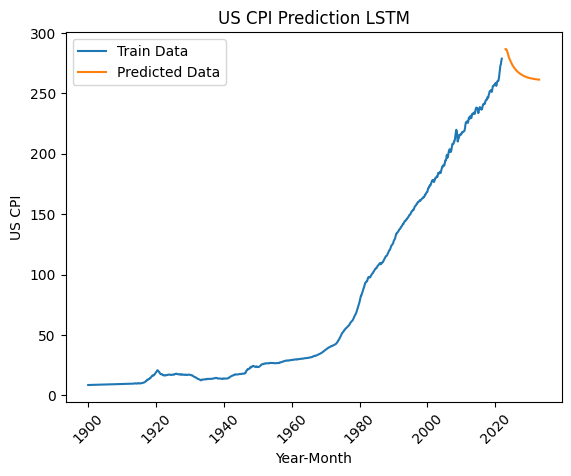

In [83]:
# 학습 데이터와 예측 결과 시각화
train_dates = data_lstm.index[:-sequence_length]

plt.plot(train_dates, cpi_data[:-sequence_length], label='Train Data')
plt.plot(test_dates, predicted, label='Predicted Data')
plt.xlabel('Year-Month')
plt.ylabel('US CPI')
plt.title('US CPI Prediction LSTM')
plt.legend()
plt.xticks(rotation=45)
plt.show()